In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Filter out a specific warning message
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Shows plots in Jupyter Notebook

In [12]:
file_path=("C:/Users/JKFX/Downloads/turing/cardio_base.csv")

In [13]:
df= pd.read_csv(file_path)

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


<Axes: >

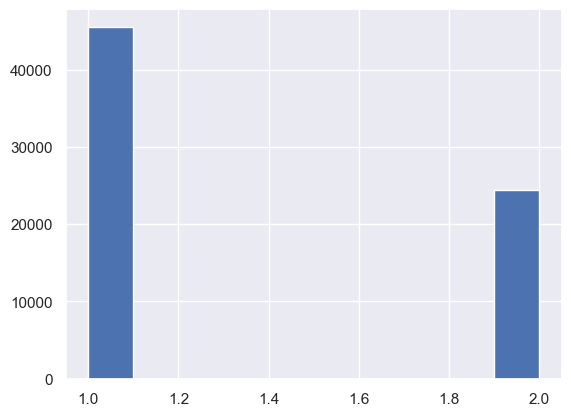

In [5]:
df.gender.hist()

<Axes: >

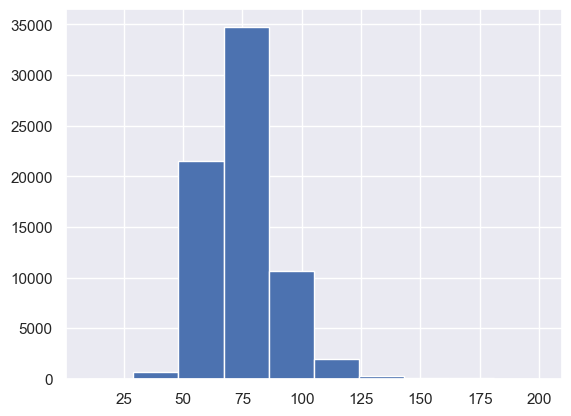

In [6]:
df.weight.hist()

<Axes: >

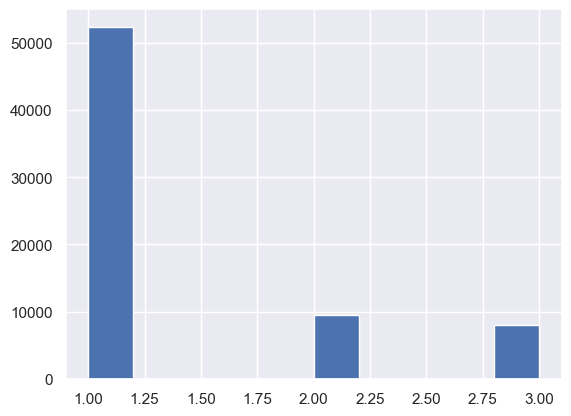

In [7]:
df.cholesterol.hist()

<Axes: >

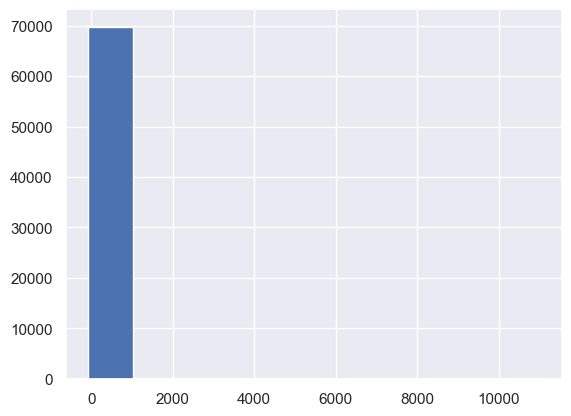

In [8]:
df.ap_lo.hist()

<Axes: >

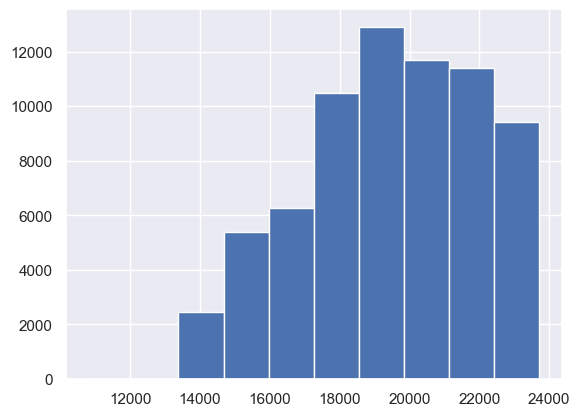

In [9]:
df.age.hist()

<Axes: >

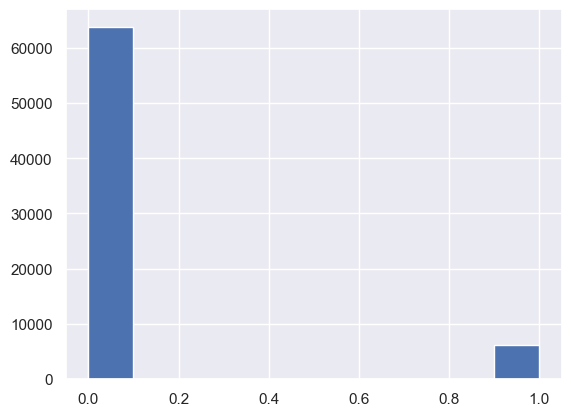

In [10]:
df.smoke.hist()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

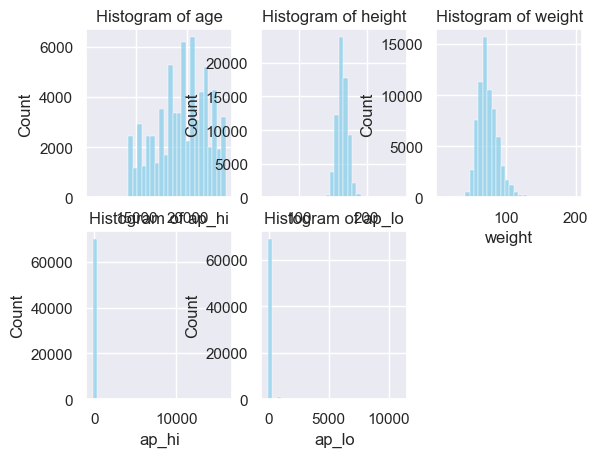

In [11]:
# Histograms
for i, column in enumerate(['age', 'height', 'weight', 'ap_hi', 'ap_lo'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=False, bins=30, color='skyblue')
    plt.title(f'Histogram of {column}')

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

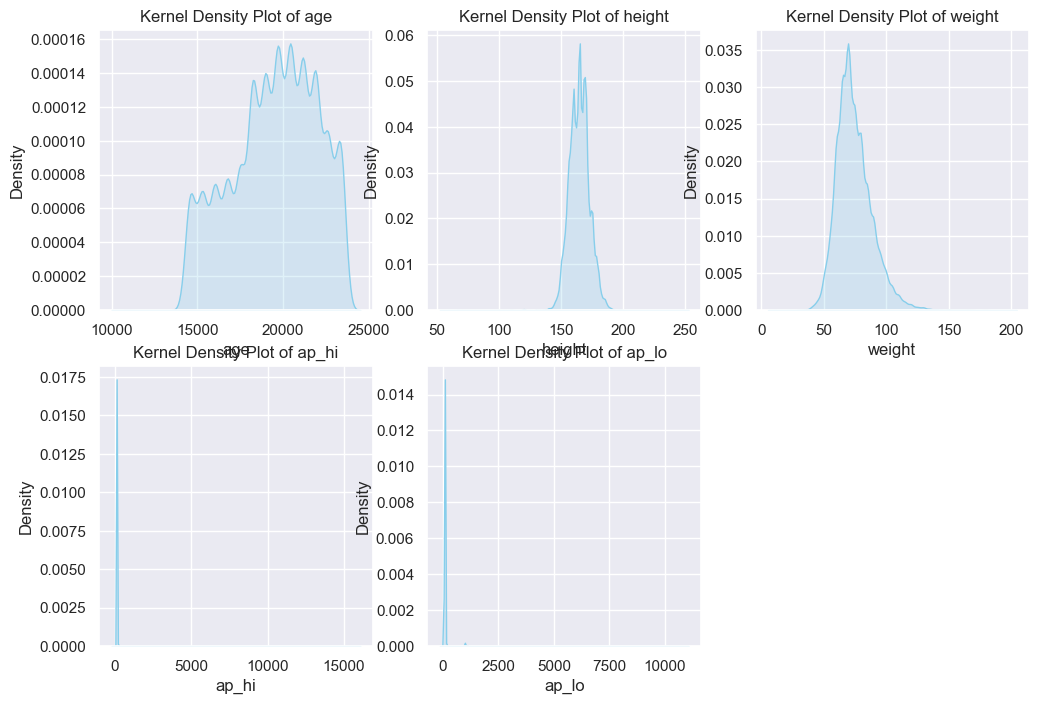

In [12]:
# Kernel Density Plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(['age', 'height', 'weight', 'ap_hi', 'ap_lo'], 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(df[column], fill=True, color='skyblue')
    plt.title(f'Kernel Density Plot of {column}')

In [13]:
# Handling Missing Values
missing_values = df.isnull().sum()  # Count missing values in each column
df = df.dropna() 

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

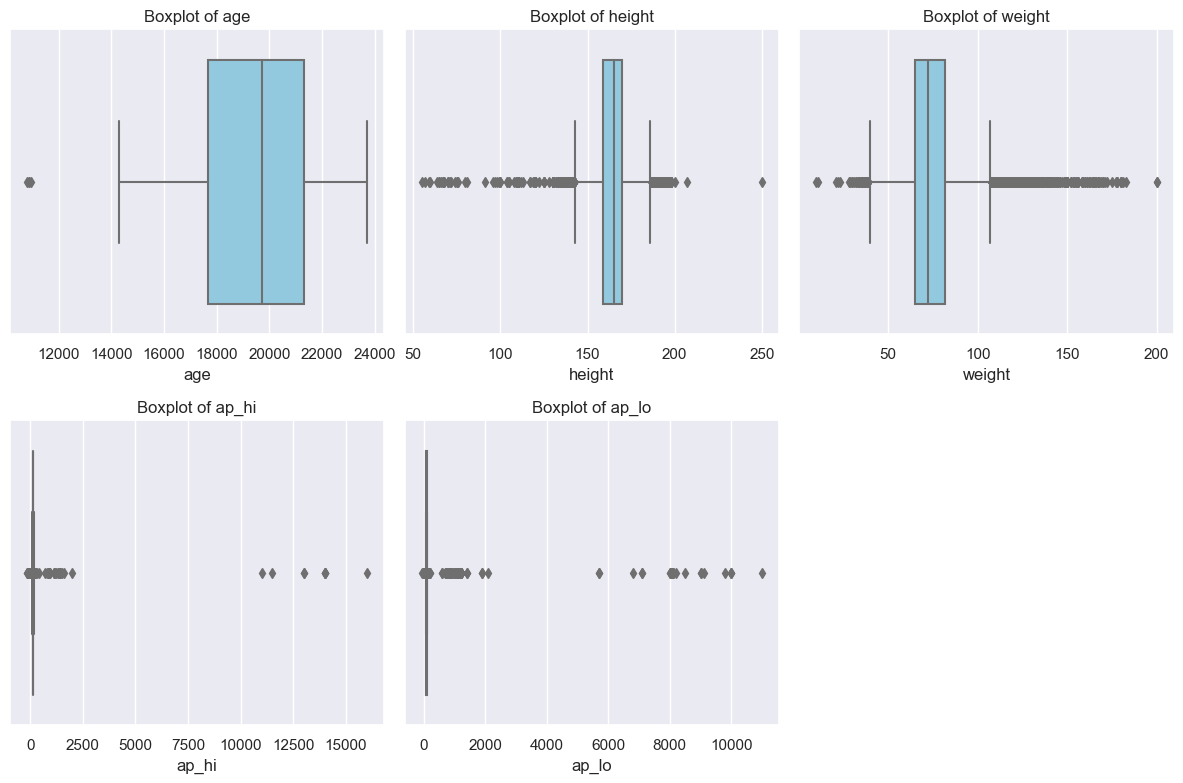

In [14]:

# Outlier Detection
plt.figure(figsize=(12, 8))

# Box plots for each numerical variable
for i, column in enumerate(['age', 'height', 'weight', 'ap_hi', 'ap_lo'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()

In [15]:
# Display extreme values (outliers)
outliers = df[(df['age'] < 0) | (df['height'] > 220) | (df['weight'] > 200) | (df['ap_hi'] > 200) | (df['ap_lo'] > 200)]

# Decide whether to remove or transform outliers based on your analysis
# df = df[(df['age'] >= 0) & (df['height'] <= 220) & (df['weight'] <= 200) & (df['ap_hi'] <= 200) & (df['ap_lo'] <= 200)]

plt.show()

In [15]:

# Feature Engineering - Body Mass Index (BMI)
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2

# Feature Engineering - Blood Pressure Category
def categorize_blood_pressure(row):
    if row['ap_hi'] < 90 or row['ap_lo'] < 60:
        return 'Low'
    elif 90 <= row['ap_hi'] <= 120 and 60 <= row['ap_lo'] <= 80:
        return 'Normal'
    elif 120 < row['ap_hi'] <= 140 or 80 < row['ap_lo'] <= 90:
        return 'Elevated'
    elif 140 < row['ap_hi'] <= 160 or 90 < row['ap_lo'] <= 100:
        return 'High Stage 1'
    else:
        return 'High Stage 2'

df['blood_pressure_category'] = df.apply(categorize_blood_pressure, axis=1)

# Print the updated dataset
print(df.head())


   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  \
0   0  18393       2     168    62.0    110     80            1      0   
1   1  20228       1     156    85.0    140     90            3      0   
2   2  18857       1     165    64.0    130     70            3      0   
3   3  17623       2     169    82.0    150    100            1      0   
4   4  17474       1     156    56.0    100     60            1      0   

         bmi blood_pressure_category  
0  21.967120                  Normal  
1  34.927679                Elevated  
2  23.507805                Elevated  
3  28.710479            High Stage 1  
4  23.011177                  Normal  


In [5]:
# Correlation Analysis
correlation_matrix = df.corr()


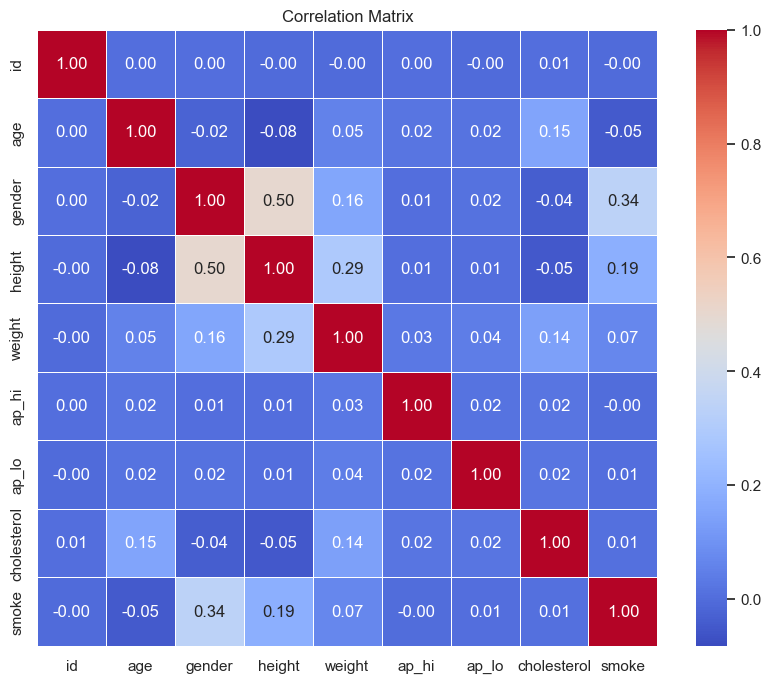

In [6]:
# Visualization - Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


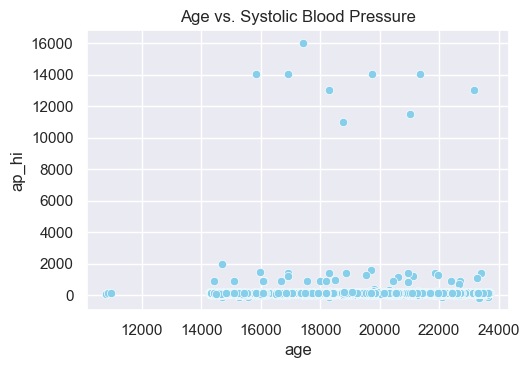

In [10]:
# Visualization - Scatter Plots
plt.figure(figsize=(12, 8))

# Age vs. Blood Pressure
plt.subplot(2, 2, 1)
sns.scatterplot(x='age', y='ap_hi', data=df, color='skyblue')
plt.title('Age vs. Systolic Blood Pressure')

plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


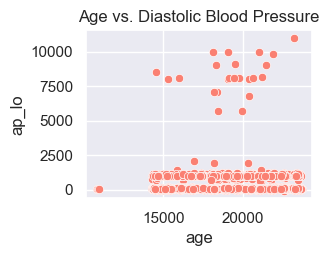

In [11]:
plt.subplot(2, 2, 2)
sns.scatterplot(x='age', y='ap_lo', data=df, color='salmon')
plt.title('Age vs. Diastolic Blood Pressure')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


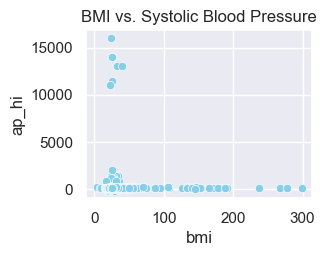

In [12]:
# BMI vs. Blood Pressure
plt.subplot(2, 2, 3)
sns.scatterplot(x='bmi', y='ap_hi', data=df, color='skyblue')
plt.title('BMI vs. Systolic Blood Pressure')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


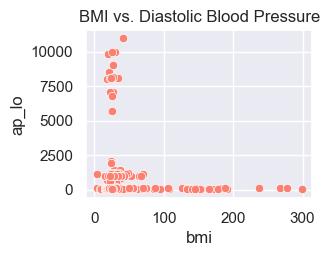

In [14]:
plt.subplot(2, 2, 4)
sns.scatterplot(x='bmi', y='ap_lo', data=df, color='salmon')
plt.title('BMI vs. Diastolic Blood Pressure')
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Figure size 640x480 with 0 Axes>

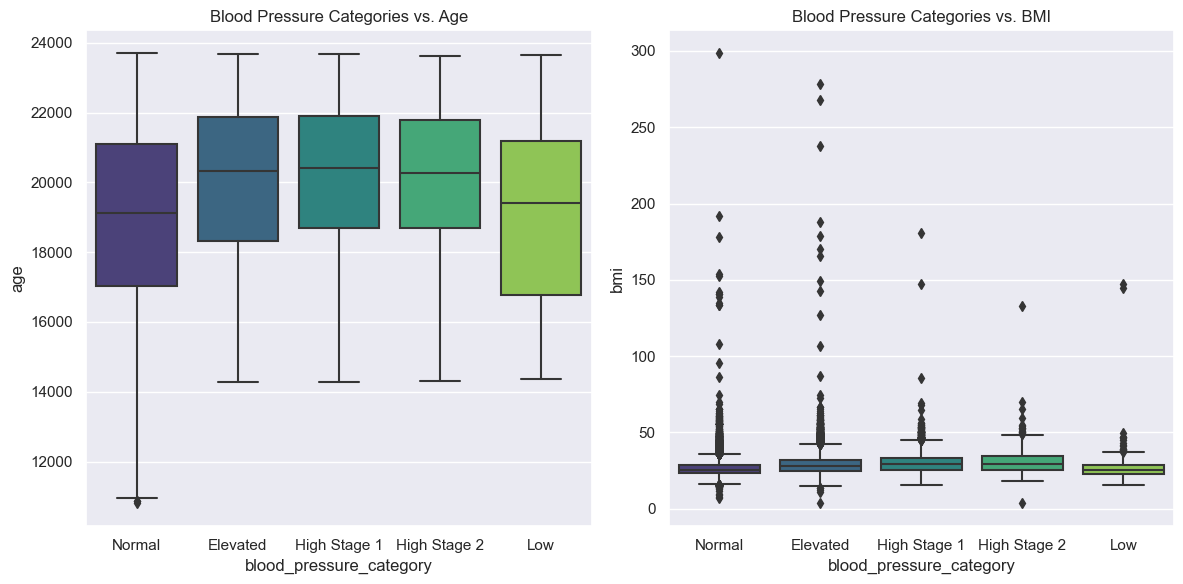

In [15]:
plt.tight_layout()

# Visualization - Box Plots
plt.figure(figsize=(12, 6))

# Blood Pressure Categories vs. Age
plt.subplot(1, 2, 1)
sns.boxplot(x='blood_pressure_category', y='age', data=df, palette='viridis')
plt.title('Blood Pressure Categories vs. Age')

# Blood Pressure Categories vs. BMI
plt.subplot(1, 2, 2)
sns.boxplot(x='blood_pressure_category', y='bmi', data=df, palette='viridis')
plt.title('Blood Pressure Categories vs. BMI')

plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


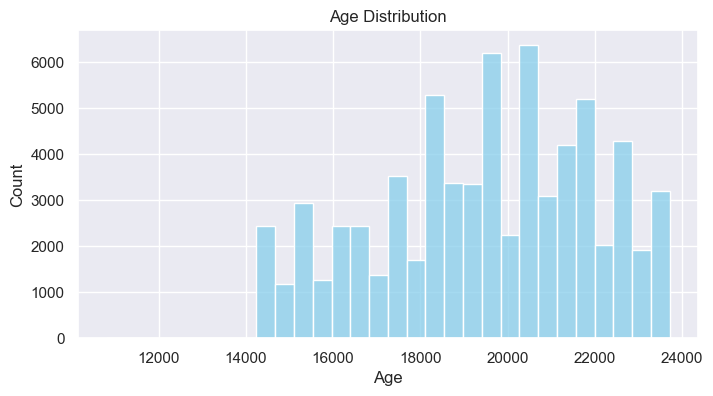

In [8]:
# Demographic Analysis - Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=False, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

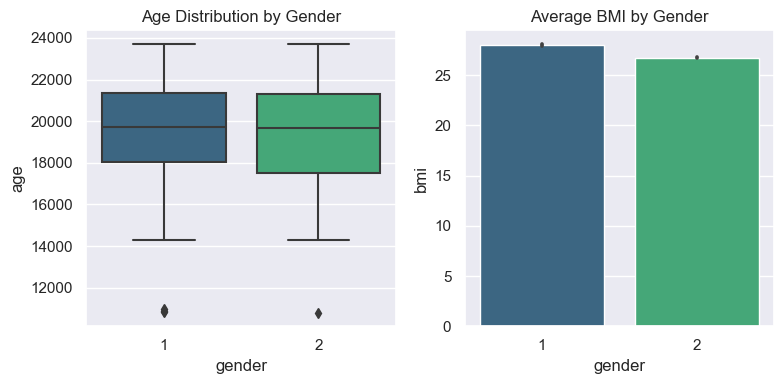

In [18]:
# Demographic Analysis - Gender Comparison
plt.figure(figsize=(8, 4))

# Age vs. Gender
plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='age', data=df, palette='viridis')
plt.title('Age Distribution by Gender')

# Health Metrics vs. Gender
plt.subplot(1, 2, 2)
sns.barplot(x='gender', y='bmi', data=df, palette='viridis')
plt.title('Average BMI by Gender')

plt.tight_layout()
plt.show()


In [5]:
df.to_csv('cardio_base_EDA.csv', index=False)